In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [3]:
X = 6*np.random.rand(200 , 1) - 3

In [4]:
Y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)


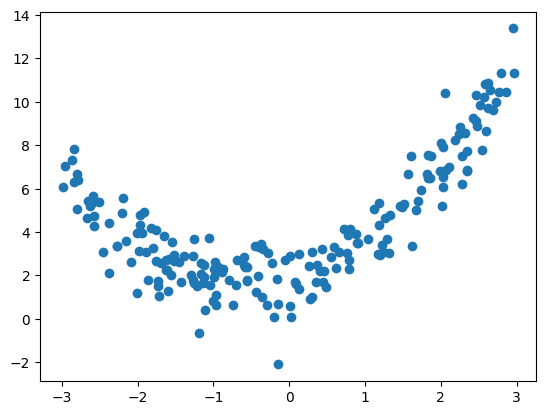

In [5]:
plt.scatter(X,Y)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [7]:
#  APPLYING LINEAR REGRESIONS
lr = LinearRegression()
lr.fit(X_train , y_train)
lr.intercept_

array([4.4776776])

In [8]:
y_pred = lr.predict(X_test)

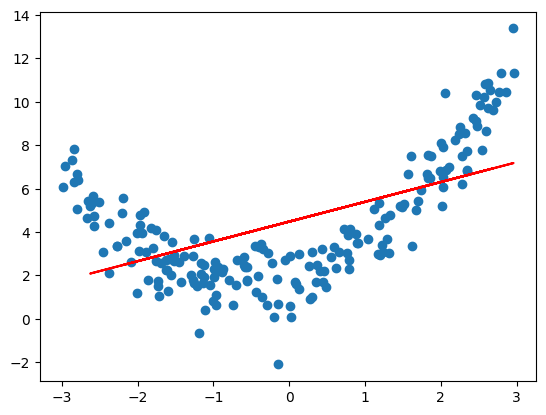

In [9]:
plt.scatter(X,Y)
plt.plot(X_test , lr.predict(X_test) , color = "r")

In [10]:
#  POLYNOMIAL REGRESSION
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [11]:
print(X_test[0])
X_test_trans[0]

[-0.97101844]


array([ 1.        , -0.97101844,  0.94287681])

In [12]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

lr.coef_

array([[0.        , 0.88866846, 0.81677982]])

In [13]:
y_pred = lr.predict(X_test_trans)

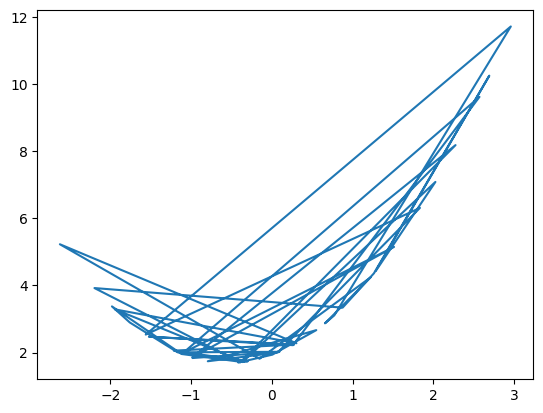

In [14]:
plt.plot(X_test , y_pred)

In [15]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


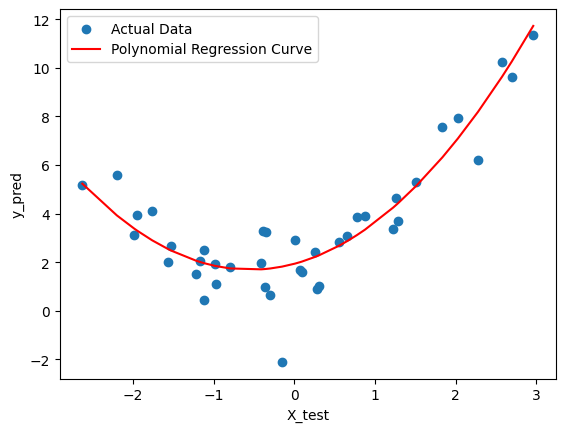

In [16]:
sorted_indices = np.argsort(X_test.ravel())
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the curve
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Polynomial Regression Curve')
plt.xlabel('X_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()